In [1]:
import numpy as np
import pandas as pd

### Introduction Pandas String Operations

In [2]:
x = np.array([1,2,3,4,5])
x * 2

array([ 2,  4,  6,  8, 10])

In [20]:
# String operation
data = ['peter', 'Rocker', 'jone', 'mIKE']
[s.capitalize()for s in data]

['Peter', 'Rocker', 'Jone', 'Mike']

In [22]:
data = ['peter', None, 'mIKE']
[s.capitalize()for s in data]

AttributeError: 'NoneType' object has no attribute 'capitalize'

In [23]:
names = pd.Series(data)
names

0    peter
1     None
2     mIKE
dtype: object

In [24]:
# can capitalize with on series
names.str.capitalize()

0    Peter
1     None
2     Mike
dtype: object

### Tables of Pandas String Methods

In [28]:
from IPython.display import Image
Image(filename = "data/methods_similar_to_python_string_methods.png", width = 700, height = 300)

In [29]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
'Eric Idle', 'Terry Jones', 'Michael Palin'])

In [30]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [31]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [32]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [33]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

### Methods using Regular Expressions

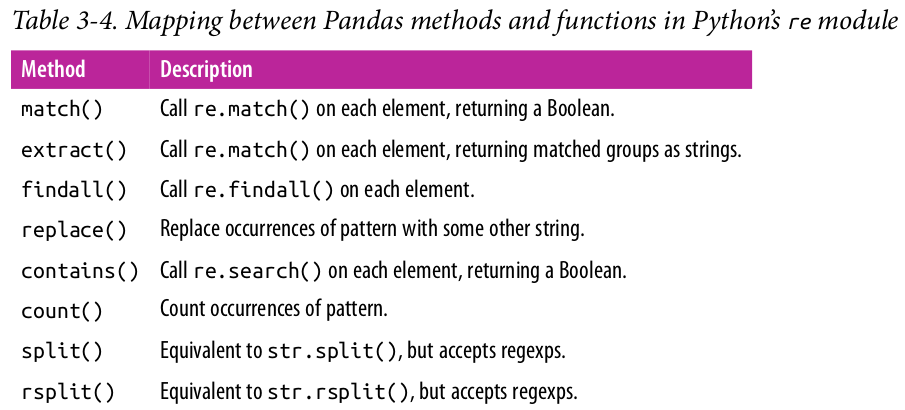

In [35]:
Image(filename="data/methods_using_regualar_expressions.png", width = 700, height = 300)

In [37]:
#extracting the contiguous group of characters at the beginning of each element
monte.str.extract('([A-Za-z]+)')

0
0   Graham
1     John
2    Terry
3     Eric
4    Terry
5  Michael

In [41]:
#Finding all names start and end with consonant
#start of the string(^) and end of the string($)

monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

- this regular expression technique in pandas is quite useful in data analysis and data cleaning

### Miscellaneous methods

In [42]:
Image(filename='data/miscellaneous_methods.png', width = 500, height = 300)

#### Vectorized item access and slicing

- python normal indexing syntax: df.str[0:3]
- python vetorized indexing syntax : df.str.slice(0,3)
- This two is equivalent

In [43]:
monte

0    Graham Chapman
1       John Cleese
2     Terry Gilliam
3         Eric Idle
4       Terry Jones
5     Michael Palin
dtype: object

In [50]:
#slicing
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [49]:
monte.str.slice(0,3)

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [55]:
#indexing
monte.str.get(3)

0    h
1    n
2    r
3    c
4    r
5    h
dtype: object

In [57]:
monte.str[3]

0    h
1    n
2    r
3    c
4    r
5    h
dtype: object

In [61]:
#get and slice method let you access elements of arrays returned by split()
monte.str.split().str.get(-1)

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

#### Indicator Variables

- get_dummies() method is useful when your data has a column containing some
  sort of coded indicator. For example, we might have a dataset that contains informa‐
  tion in the form of codes, such as A=“born in America,” B=“born in the United King‐
  dom,” C=“likes cheese,” D=“likes spam”:

In [68]:
full_monte = pd.DataFrame({'info': ['B|C|D', 'B|D', 'A|C', 'B|D', 'B|C', 'B|C|D'],
                           'name':monte})
full_monte

info            name
0  B|C|D  Graham Chapman
1    B|D     John Cleese
2    A|C   Terry Gilliam
3    B|D       Eric Idle
4    B|C     Terry Jones
5  B|C|D   Michael Palin

- The get_dummies() routine lets you quickly split out these indicator variables into a DataFrame.

In [71]:
full_monte['info'].str.get_dummies('|')

A  B  C  D
0  0  1  1  1
1  0  1  0  1
2  1  0  1  0
3  0  1  0  1
4  0  1  1  0
5  0  1  1  1

### futher reading about detail vetorized operations in pandas

https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html